<a href="https://colab.research.google.com/github/aurnam18/Additional-project/blob/master/Copy_of_Hierarchical_Clustering_Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering Starter Code

Import all the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

### The Dataset

Mall Customers: You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

[Link to dataset](https://www.kaggle.com/kandij/mall-customers)

The following command imports the dataset from the file you downloaded:

In [2]:
dataset = pd.read_csv('mall.csv')

Let’s explore the data a little bit by checking the number of rows and columns in it.

In [3]:
dataset.shape

(200, 5)

It will give (200, 5) as output which means our dataset has 200 rows and 5 columns.

To see the first five rows of the dataset, we can use head():

In [ ]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. Execute the following script to filter the first three columns from our dataset:

In [4]:
# Set dataset equal to the last two columns (Annual Income (k$) and Spending Score (1-100))
dataset.drop(["CustomerID", "Genre", "Age"], axis=1, inplace=True)


Now, we are good to go.

### The Dendrogram

Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:

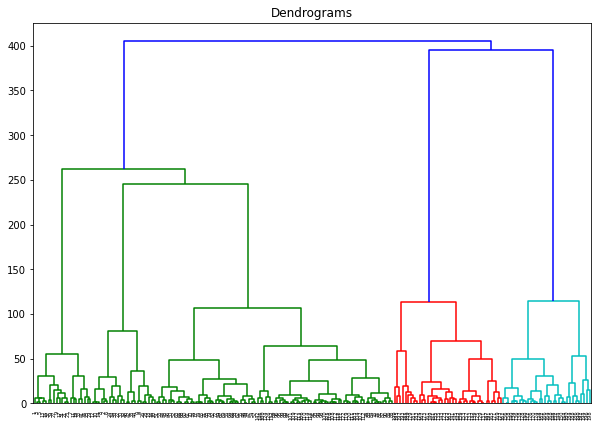

In [6]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dataset, method='ward'))

In the script above we import the hierarchy class of the scipy.cluster library as shc. The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 5 clusters.

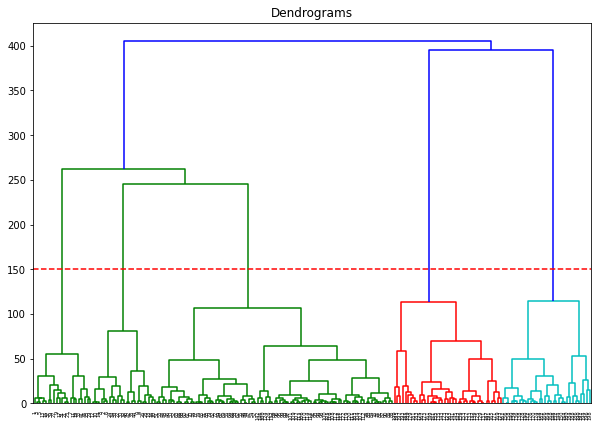

In [8]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dataset, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')

We have five clusters as this line cuts the dendrogram at five points. 

### Create the Agglomerative Clustering Model

Let’s now apply hierarchical clustering for 5 clusters:

In [10]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(dataset)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

You can see the cluster labels from all of your data points. Since we had five clusters, we have five labels in the output i.e. 0 to 4. Let’s now visualize the five clusters:

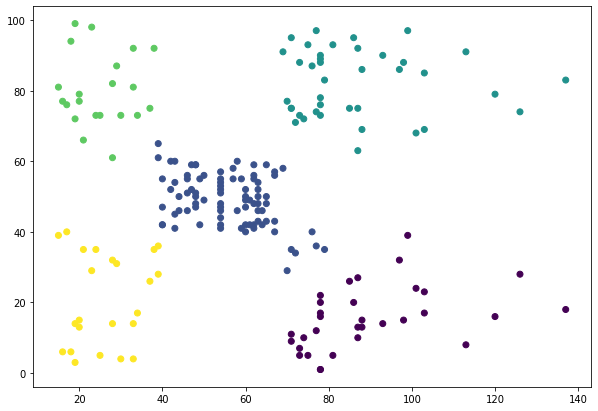

In [11]:
plt.figure(figsize=(10, 7))  
plt.scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], c=cluster.labels_) 

Awesome! We can clearly visualize the five clusters here. This is how we can implement hierarchical clustering in Python.